In [1]:
import numpy as np
from numpy.linalg import inv, det


import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from genetic_one import Gen1

import random
random.seed(99)

In [2]:
def xyz_gen(gen, function):
    
    x=[x[0] for x in gen]
    y=[x[1] for x in gen]
    z=[function([x[i],y[i]]) for i in range(len(gen))]
    return x,y,z

In [3]:
N1 = 100
N2 = 100
Ef = 2
EfI=  Ef*np.array([[1,0],[0,1]])
piI = 2*np.pi* np.array([[1,0],[0,1]])

A = np.array([ [1/2, np.sqrt(3)/2],
               [1/2, -np.sqrt(3)/2]]).T
invA= inv(A)
B = 2*np.pi*invA.T

def H_mat(n1,n2):
    
    k = (n1/N1)*B[:,0]+(n2/N2)*B[:,1]
    
    ka1=np.dot(A[:,0],k) # ka1,k2 = np.dot(A,k)
    ka2=np.dot(A[:,1],k)
    
    f = np.exp(1j*ka1)+ np.exp(1j*ka2)+1 
    
    f_conj= np.conj(f)
    
    H = np.array([[0, f],[f_conj,0]])
    
    return H

def det_sq(n1,n2):
    
    det_H= det( H_mat(n1,n2)-EfI )

    return np.real(det_H)*np.real(det_H)

def bands_F(n1,n2):
    
    bands= np.linalg.eigvals( H_mat(n1,n2) )

    return np.real(bands)


In [4]:
print("bands",bands_F(33, 66))
print("det_sq",det_sq(33, 66))

bands [ 0.03649265 -0.03649265]
det_sq 15.989348064380037


(2, 100, 100)


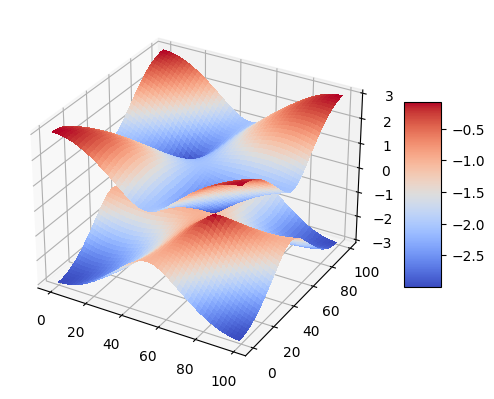

In [5]:
X1 =  np.arange(0, N1, 1)
X2 =  np.arange(0, N2, 1)

              
bands= np.transpose([[ bands_F(x1,x2) for x2 in X2] for x1 in X1], axes=[2,1,0])
print(bands.shape)  

X1, X2 = np.meshgrid(X1, X2)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

for band in bands:

    surf = ax.plot_surface(X1, X2, band, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

zsort: [2.74623303e-05 2.74623303e-05 2.74623303e-05 2.74623303e-05
 2.74623303e-05]


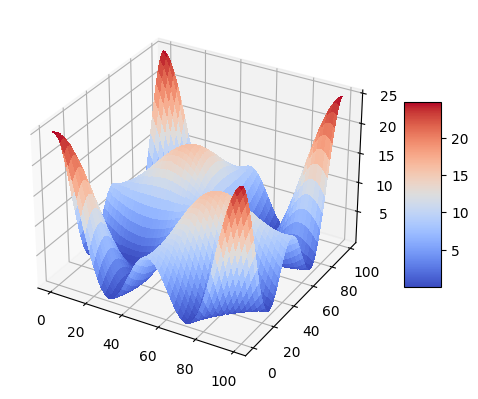

In [6]:
def fit_function(x):

    return det_sq(x[0],x[1])

X1 =  np.arange(0, N1, 1)
X2 =  np.arange(0, N2, 1)

              
Z= np.array([fit_function([x1,x2]) for x2 in X2 for x1 in X1])
print("zsort:",np.sort(Z)[:5]) 

Z= np.array([[fit_function([x1,x2]) for x2 in X2] for x1 in X1])

X1, X2 = np.meshgrid(X1, X2)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1, X2, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [7]:
# Experiment settings

#Hyperparameters of the model
model_par = {
    
    'cell_split_number': 10, 
    'subjects_in_cell': 1,

    'nr_clones': 5,
    'mutation_gaussian_sd': 4,

    'pins': 5,
    'gene_quality': 1,
    
}

#
input_size = 2 # since our function has one variable this is a trivial scenario.
bounds =[[1,N1],[1,N2]] # searching intervals for the solution

# Experiment
experiment = Gen1(fit_function ,input_size, bounds, model_par)

gen_0: [[7, 7], [4, 19], [3, 23], [4, 32], [2, 44], [7, 58], [9, 61], [10, 77], [4, 86], [10, 99], [13, 6], [16, 20], [13, 22], [17, 40], [12, 49], [15, 51], [18, 70], [11, 77], [15, 86], [10, 94], [28, 1], [26, 13], [25, 28], [21, 37], [28, 43], [29, 57], [20, 65], [22, 73], [22, 87], [29, 92], [38, 3], [30, 11], [30, 22], [37, 40], [36, 41], [36, 60], [31, 62], [34, 79], [30, 86], [35, 92], [48, 7], [43, 10], [50, 23], [47, 34], [48, 46], [42, 55], [47, 60], [42, 79], [42, 89], [46, 91], [51, 2], [52, 14], [52, 22], [56, 32], [53, 48], [55, 57], [53, 64], [51, 75], [52, 90], [51, 98], [64, 1], [69, 10], [65, 23], [66, 36], [65, 46], [66, 56], [65, 68], [61, 72], [60, 85], [66, 97], [73, 5], [80, 13], [80, 24], [71, 35], [73, 50], [73, 56], [74, 67], [71, 77], [76, 84], [71, 98], [84, 6], [87, 18], [82, 24], [86, 34], [86, 50], [89, 52], [84, 66], [90, 80], [89, 89], [90, 97], [93, 7], [95, 13], [95, 20], [100, 35], [94, 43], [100, 60], [92, 70], [94, 80], [96, 83], [96, 95]]


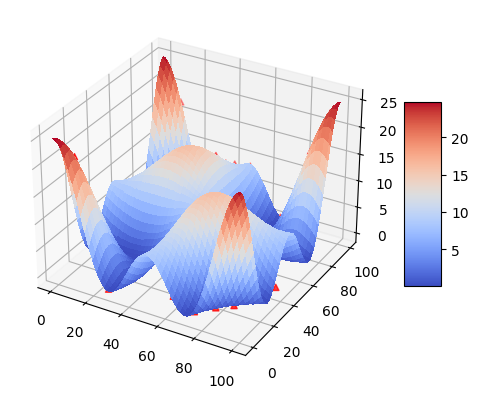

In [8]:
# first generation
# 'cell_split_number': 5 and  'subjects_in_cell': 2,
#  we expect 10 possible solutions.

gen_0 = experiment.first_generation()
experiment.actual_generation = gen_0
print("gen_0:", gen_0)


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1, X2, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)
x,y,z = xyz_gen(gen_0, fit_function)
ax.scatter(x,y,z , c='r', marker='^')
plt.show()

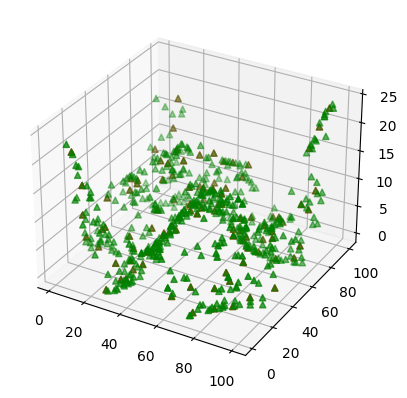

In [9]:
# mutation_1 

clone_family = experiment.mitosis()
# print("clone_family:",clone_family)

c_dist=[]
for family in clone_family:
    for p in family:
        c_dist.append(p)

# print("c_dist:",c_dist)


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# surf = ax.plot_surface(X1, X2, Z, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)


fig.colorbar(surf, shrink=0.5, aspect=5)
# ax.set_zlim(-1.01, 1.01)
x,y,z = xyz_gen(gen_0, fit_function)
ax.scatter(x,y,z , c='r', marker='^')
x,y,z = xyz_gen(c_dist, fit_function)
ax.scatter(x,y,z , c='g', marker='^')


generation: [[18, 7], [3, 22], [4, 25], [11, 33], [1, 36], [1, 60], [8, 67], [10, 77], [5, 85], [16, 94], [21, 3], [14, 23], [16, 29], [20, 37], [16, 47], [17, 42], [18, 78], [9, 77], [19, 89], [11, 87], [31, 5], [32, 13], [28, 28], [23, 32], [29, 38], [27, 48], [11, 69], [22, 79], [22, 87], [25, 88], [33, 3], [35, 12], [30, 26], [35, 33], [32, 34], [36, 50], [26, 60], [34, 86], [25, 90], [29, 97], [48, 7], [37, 17], [45, 21], [37, 35], [46, 41], [40, 45], [53, 65], [47, 84], [37, 93], [53, 92], [48, 5], [46, 14], [49, 25], [52, 38], [53, 51], [59, 58], [57, 62], [58, 68], [56, 85], [57, 95], [64, 1], [74, 8], [70, 18], [60, 35], [66, 49], [67, 62], [73, 73], [65, 68], [65, 79], [70, 99], [73, 5], [80, 13], [82, 17], [72, 30], [72, 54], [75, 62], [76, 68], [67, 77], [81, 71], [68, 91], [81, 9], [87, 18], [86, 22], [93, 32], [81, 53], [94, 54], [85, 67], [91, 76], [82, 85], [86, 92], [86, 9], [91, 14], [93, 24], [100, 35], [98, 40], [98, 67], [93, 68], [97, 79], [99, 80], [92, 93]]


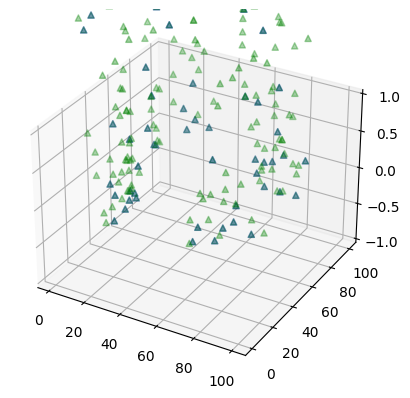

In [10]:
# kill_1

# Keep the best from each family and kill the underperformer.
generation,performances = experiment.kill(clone_family)
print("generation:",generation)

alt_performance= [-p for p in performances]


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# surf = ax.plot_surface(X1, X2, Z, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)


fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_zlim(-1.01, 1.01)
x,y,z = xyz_gen(c_dist, fit_function)
ax.scatter(x,y,z , c='g', marker='^')
x,y,z = xyz_gen(generation, fit_function)
ax.scatter(x,y,z , c='b', marker='^')

perf [-10.254335725026547, -4.308058223065098, -2.057922503232917, -0.002277029806490291, -2.1151776324174554, -5.3390404939690965, -3.6082895912998025, -0.008988346832310272, -7.266892979580003, -5.3174939094074265, -5.352341748375383, -4.902550106907003, -0.8899432352821851, -0.6202395307696381, -6.912534977601573, -3.200900321760533, -1.9368644521294394, -0.007702473181588709, -0.43459949003304077, -4.144081559857137, -0.0016227110786983716, -0.0644066912604756, -0.06273759620819107, -0.007702473181587879, -1.6044305402792158, -7.493994372726568, -3.7940650046144397, -3.7539515931815846, -0.1863766873010477, -0.830207000316023, -0.38064807610188334, -0.21805797606441724, -0.037462103582783325, -1.3336749428356192, -0.8816886432192034, -8.999999999999998, -14.556274625714014, -7.73415574403009, -0.31084696648948834, -0.14773557380109076, -8.198092610891342, -0.6202395307696363, -5.194534838293268, -2.4349583685958263, -7.418591482974671, -6.854101966249683, -7.1942384205946786, -10.6

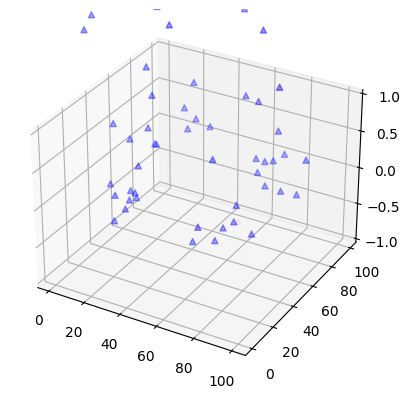

In [11]:
# reproduction_1

new_generation = experiment.reproduction(generation, performances)
print("new genration:",new_generation)




fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# surf = ax.plot_surface(X1, X2, Z, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)


fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_zlim(-1.01, 1.01)

x1,y1,z1 = xyz_gen(generation, fit_function)
ax.scatter(x1,y1,z1 , c='b', marker='^')

x,y,z = xyz_gen(new_generation, fit_function)
ax.scatter(x,y,z , c='pink', marker='^')

clone_family: [[[74, 8], [79, 5], [78, 10], [71, 8], [72, 11], [73, 9]], [[87, 22], [89, 23], [84, 18], [85, 23], [92, 20], [89, 24]], [[46, 8], [42, 5], [50, 3], [45, 10], [51, 10], [48, 9]], [[46, 8], [44, 8], [53, 12], [48, 9], [48, 14], [42, 2]], [[46, 8], [48, 9], [45, 11], [51, 13], [45, 9], [51, 10]], [[100, 35], [99, 38], [98, 41], [88, 34], [98, 25], [99, 38]], [[59, 21], [60, 22], [56, 23], [54, 22], [54, 22], [63, 24]], [[59, 21], [60, 19], [60, 11], [59, 30], [66, 19], [60, 23]], [[59, 21], [55, 18], [62, 16], [60, 21], [61, 21], [63, 17]], [[18, 7], [15, 6], [20, 8], [23, 5], [14, 12], [21, 6]], [[18, 7], [16, 8], [14, 5], [17, 12], [21, 5], [13, 11]], [[18, 7], [20, 11], [16, 10], [20, 6], [18, 7], [17, 18]], [[18, 7], [19, 9], [9, 10], [11, 8], [16, 4], [18, 13]], [[18, 7], [15, 7], [26, 3], [24, 6], [29, 9], [17, 11]], [[18, 7], [18, 6], [15, 3], [18, 11], [17, 7], [14, 10]]]
c_dist: [[74, 8], [79, 5], [78, 10], [71, 8], [72, 11], [73, 9], [87, 22], [89, 23], [84, 18], 

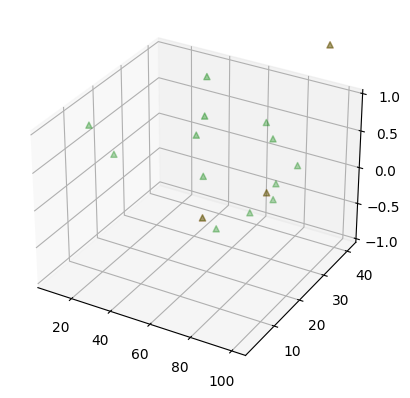

In [12]:
# mutation_2

experiment.actual_generation = new_generation
clone_family = experiment.mitosis()
print("clone_family:",clone_family)

c_dist=[]
for family in clone_family:
    for p in family:
        c_dist.append(p)

print("c_dist:",c_dist)



fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# surf = ax.plot_surface(X1, X2, Z, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)


fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_zlim(-1.01, 1.01)

x1,y1,z1 = xyz_gen(c_dist, fit_function)
ax.scatter(x1,y1,z1 , c='g', marker='^')

x,y,z = xyz_gen(new_generation, fit_function)
ax.scatter(x,y,z , c='r', marker='^')

generation: [[78, 10], [84, 18], [42, 5], [44, 8], [45, 11], [98, 25], [54, 22], [60, 11], [62, 16], [23, 5], [21, 5], [20, 6], [19, 9], [29, 9], [18, 6]]


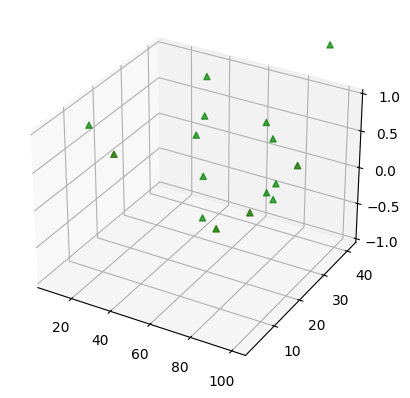

In [13]:
# kill_2

generation,performances = experiment.kill(clone_family)
print("generation:",generation)

alt_performance= [-p for p in performances]




fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# surf = ax.plot_surface(X1, X2, Z, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)


fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_zlim(-1.01, 1.01)

x1,y1,z1 = xyz_gen(c_dist, fit_function)
ax.scatter(x1,y1,z1 , c='g', marker='^',alpha =0.7)

x,y,z = xyz_gen(generation, fit_function)
ax.scatter(x,y,z , c='r', marker='^')

Epochs 0/20
perf [-21.337940750560225, -6.859618527416853, -0.5381145803398852, -0.14668726804384896, -7.2369171978380775, -8.448416874605563, -0.23557740606545693, -0.03959544356620139, -1.8279200116839163, -5.524081902852789, -0.47201978409519657, -10.518849275411828, -1.3686708938007472, -0.38196601125010565, -0.252110658503964, -8.256636237386232, -2.0174573885989573, -0.7646085192537918, -0.025546901163820412, -0.034912054307300405, -0.08361055043655011, -4.902550106906999, -0.47201978409519874, -0.00227702980649009, -3.8341380725006267, -9.659677811520757, -11.65513842342564, -1.4083598771082904, -0.6121419826653072, -0.0017559852930554415, -0.0007094666948493085, -0.42913937129130464, -0.037462103582783325, -0.037462103582783325, -2.4015575653246857, -11.185414232504472, -10.956416841520909, -8.999999999999998, -0.002277029806490238, -4.496875400914664, -8.046299770909739, -2.614696312227995, -0.7003323090663556, -5.694990613986785, -3.057447496611411, -11.582409343442405, -13.5

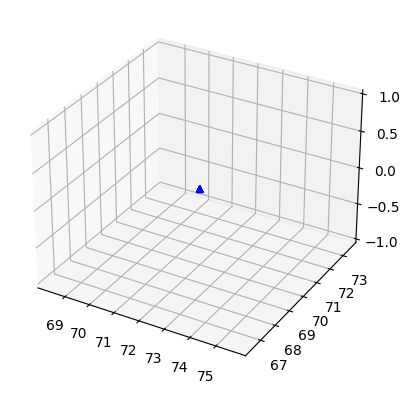

In [14]:
## Automate evolution

nr_epochs = 20
last_generation = experiment.evolve(nr_epochs)
fit = [fit_function(x) for x in last_generation] 
print("fit:",fit)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# surf = ax.plot_surface(X1, X2, Z, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)


fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_zlim(-1.01, 1.01)


x,y,z = xyz_gen(last_generation, fit_function)
ax.scatter(x,y,z , c='b', marker='^')

In [15]:
det_sq(34,67)

15.989348064380037

In [16]:
det_sq(33,67)

15.989348064380037